Sebastian Yepes Acevedo

Cc:1007448816

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1)

Comenzamos generando un dataframe para el tratamiento de los datos del laboratorio.

In [3]:
Y = np.arange(0,6,1)
x_1  = np.arange(0,6,1)
tr = np.arange(0,6,1)

d = {"X_1": x_1, "Y": Y, "Entrenamiento":tr}

df = pd.DataFrame(d)
df = df.set_index("Entrenamiento")

display(df)

,X_1,Y
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


# 2.

Creamos la función de coste basados en la ecuación:

$$J=\frac{1}{2m}\sum{((\theta_0-\theta_1X)-y)^2}$$

In [4]:
def cost(t0,t1,x,y):
  m = len(x)
  p = t0 + t1*x
  cost = (1/2)*m*sum((p-y)**2)
  return cost

# 3

Asumiendo que $\theta_0=0$, utilizamos la función creada en el punto anterior y generamos un conjunto de datos para $\theta_1$

In [5]:
theta1 = np.linspace(-2, 4, 100)
J = np.array([cost(0,t,df['X_1'],df['Y']) for t in theta1])

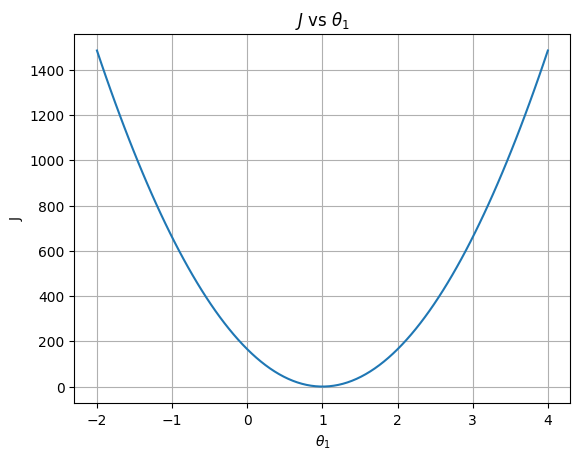

In [6]:
plt.plot(theta1,J)
plt.xlabel("$θ_1$")
plt.ylabel("J")
plt.title(r"$J$ vs $\theta_1$")
plt.grid()
plt.show()

In [7]:
thetamin = theta1[np.argmin(J)]
J_min = min(J)

print(f"Valor mínimo de θ1 = {thetamin:.3f}")
print(f"Valor mínimo de la función de costo J = {J_min:.6f}")

Valor mínimo de θ1 = 0.970
Valor mínimo de la función de costo J = 0.151515


Encontramos el valor mínimo de la función de costo, que se podía esperar al ver la gráfica generada. Ahora podemos gráficar la regresión de los datos.

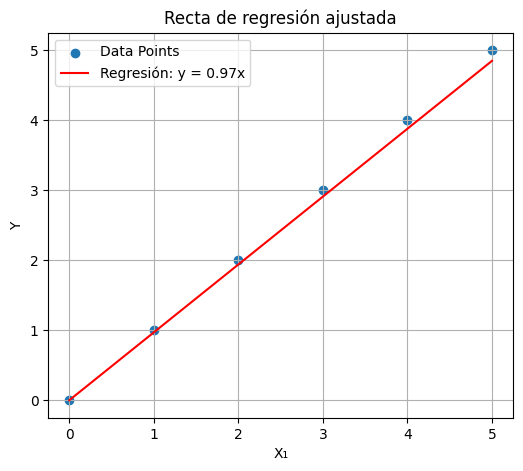

In [8]:
plt.figure(figsize=(6, 5))
plt.scatter(df.X_1, df.Y, label='Data Points')
plt.plot(df.X_1, thetamin * df.X_1, color='red', label=f'Regresión: y = {thetamin:.2f}x')
plt.title("Recta de regresión ajustada")
plt.xlabel("X₁")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# 4.

Basados ahora en la suposición de los datos del dataframe como datos de entrenamiento, generaremos la función de coste teniendo en cuenta a $\theta_0$ y con ello veremos un mapa de contornos de la función.

In [9]:
theta0 = np.linspace(-2, 2, 100)
T_0,T_1 = np.meshgrid(theta0,theta1)
J2 = np.array([[cost(t0,t1,df['X_1'],df['Y']) for t1 in theta1] for t0 in theta0])

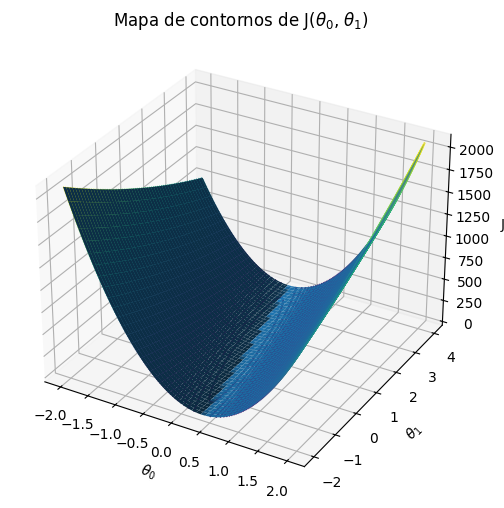

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_0, T_1, J2 )
ax.contour(T_0, T_1, J2, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
plt.title('Mapa de contornos de J($\\theta_0$, $\\theta_1$)')
plt.show()

# 5

**Caso 1D**

Partiendo de $$J(\theta_1)=\frac{1}{2m}\sum{(\theta_1x_i-y_i)^2}$$

expandimos con $S_{xx}=\sum{x^2_i}$,$S_{xy}=\sum{x_iy_i}$ , $S_{yy}=y^2_i$:

$$J(\theta_1)=\frac{1}{2m}(\theta_1^2S_{xx}-2\theta_1S_{xy}+S_{yy})$$

Resolviendo y derivando para obtener el mínimo tenemos:

$$d{J}/d\theta_1 = \frac{1}{2m}(2\theta_1S_{xx}-2S_{xy})=0 $$

$$J_{min} = \frac{1}{2m}\left(S_{yy}-\frac{S^2_{xy}}{S_{xx}}\right)$$

**Caso 2D**

$\theta = (\theta_0, \theta_1)$



$h_{\theta}(x_i) = \theta_0 + \theta_1 x_i
$


$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \theta_0 + \theta_1 x_i - y_i \right)^2
$$

Definimos:

$
S_x = \sum x_i, \quad S_y = \sum y_i, \quad S_{xx} = \sum x_i^2, \quad S_{xy} = \sum x_i y_i, \quad S_{yy} = \sum y_i^2
$

Expandiendo:

$$
\sum_{i=1}^{m} \left( \theta_0 + \theta_1 x_i - y_i \right)^2 = m \theta_0^2 + 2 \theta_0 \theta_1 S_x + \theta_1^2 S_{xx} - 2 \theta_0 S_y - 2 \theta_1 S_{xy} + S_{yy}
$$

Por tanto, tenemos:

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \left( m \theta_0^2 + 2 \theta_0 \theta_1 S_x + \theta_1^2 S_{xx} - 2 \theta_0 S_y - 2 \theta_1 S_{xy} + S_{yy} \right)
$$

Si \( X \) es la matriz

$
X = \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m
\end{pmatrix}, \quad \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}, \quad y = \begin{pmatrix} y_1 \\ \vdots \\ y_m \end{pmatrix}
$

Entonces:

$$
J(\theta) = \frac{1}{2m} \left( \theta^T X^T X \theta - 2 \theta^T X^T y + y^T y \right)
$$

$$
\frac{\partial J}{\partial \theta} = 0 \quad \Rightarrow \quad X^T X \theta = X^T y
$$

Es decir:

$
\begin{pmatrix} m & S_x \\ S_x & S_{xx} \end{pmatrix} \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix} = \begin{pmatrix} S_y \\ S_{xy} \end{pmatrix}
$

$$
\theta^* = (X^T X)^{-1} X^T y
$$

El valor mínimo sería:

$$
J_{\text{min}}=\frac{1}{2m} \left( S_{yy} - (X^T y)^T (X^T X)^{-1} (X^T y) \right)
$$

Equivalente a la forma escalar:

$$
J_{\text{min}} = \frac{1}{2m} \left( S_{yy} - b^T A^{-1} b \right) \quad \text{con} \quad A = X^T X, \quad b = X^T y
$$

# 6

Generaremos un gradiente descendiente como primera aproximación para la función $f(x)=(x-4)^2$

In [11]:
#Definimos la función y su derivada

def f(x):
    return (x - 4)**2

def df(x):
    return 2 * (x - 4)

def gradiente_descendente(x0, alpha, epsilon = 1e-4, max_iter = 1000):
    x = x0
    hist = np.zeros(max_iter)
    for i in range(max_iter):
        grad = df(x)
        x_new = x - alpha * grad
        hist[i] = (x_new)
        if abs(x_new - x) < epsilon:
            break
        x = x_new
    return x_new, f(x_new), i+1, hist

# Valores iniciales
x0 = np.random.uniform(-10, 10)
alphas = [0.01, 0.1, 0.5]
print(f"Valor inicial aleatorio: x0 = {x0:.3f}\n")

for a in alphas:
    x_min, f_min, n_iter, _ = gradiente_descendente(x0, a)
    print(f"α = {a}")
    print(f"→ Mínimo encontrado en x = {x_min:.5f}")
    print(f"→ f(x) = {f_min:.6f}")
    print(f"→ Iteraciones: {n_iter}\n")

Valor inicial aleatorio: x0 = 0.859

α = 0.01
→ Mínimo encontrado en x = 3.99511
→ f(x) = 0.000024
→ Iteraciones: 320

α = 0.1
→ Mínimo encontrado en x = 3.99967
→ f(x) = 0.000000
→ Iteraciones: 41

α = 0.5
→ Mínimo encontrado en x = 4.00000
→ f(x) = 0.000000
→ Iteraciones: 2



# 7.

En este punto seguimos el video del ejemplo guía del canal DotCsv para crear el método de gradiente descendiente para una función más compleja

In [12]:
import scipy as sc

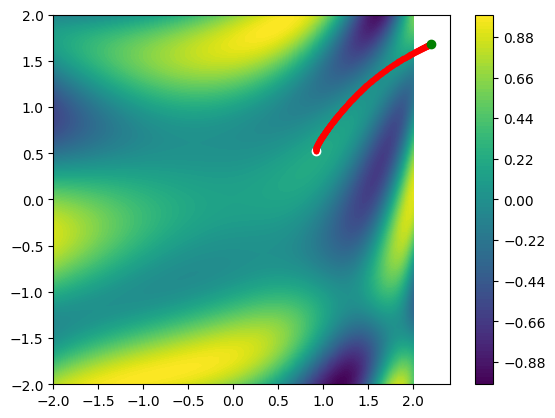

In [13]:
#Definimos la función
func = lambda th: np.sin(1/2*(th[0]**2) - 1/4*(th[1]**2) + 3)*np.cos(2*th[0] + 1 - np.e**th[1])

_x = np.linspace(-2,2,100)
_y = np.linspace(-2,2,100)

_z = np.zeros((len(_x),len(_y)))

for ix, x in enumerate(_x):
    for iy, y in enumerate(_y):
        _z[ix,iy] = func([x,y])

plt.contourf(_x,_y,_z,100)
plt.colorbar()

theta = np.random.rand(2)*4 - 2

_t = np.copy(theta)
h=0.001

plt.plot(theta[0], theta[1], "o",c="white")

grad = np.zeros(2)

for _ in range(10000):

  for it , th in enumerate(theta):

    _t = np.copy(theta)
    _t[it] += h
    der = (func(_t)-func(theta))/h
    grad[it] = der

  theta = theta - 0.001 * grad #0.001 corresponde al learning rate
  if(_%10 == 0):
    plt.plot(theta[0], theta[1], ".",c="red")
plt.plot(theta[0], theta[1], "o",c="green")

plt.show()

# 8)

Para ejemplificar un problema de machine learning, realizamos los pasos mostrados en el laboratorio, similares a los procesos realizados anteriormente, generaremos una regresión lineal.

Convergencia en 913 iteraciones.
θ0 = 0.2093, θ1 = 0.2003
Costo final = 0.000000e+00


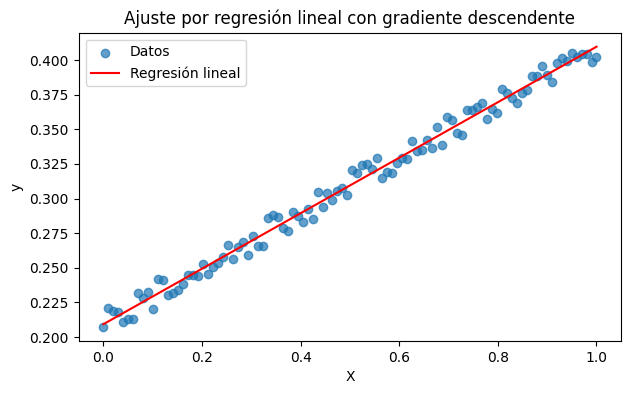

In [14]:
np.random.seed(42)
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
m = len(X)


theta0 = 0
theta1 = 0
alpha = 0.1        # tasa de aprendizaje
eps = 1e-6         # tolerancia de error
max_iter = 10000   # límite de iteraciones

def cost(X, y, theta0, theta1):
    h = theta0 + theta1*X
    return (1/(2*m)) * np.sum((h - y)**2)

# Gradiente descendente
J_hist = np.zeros(max_iter)
for i in range(max_iter):
    h = theta0 + theta1*X
    dtheta0 = (1/m) * np.sum(h - y)
    dtheta1 = (1/m) * np.sum((h - y)*X)

    theta0_new = theta0 - alpha * dtheta0
    theta1_new = theta1 - alpha * dtheta1


    J_hist[i] = (cost(X, y, theta0_new, theta1_new))


    if abs(theta0_new - theta0) < eps and abs(theta1_new - theta1) < eps:
        break

    theta0, theta1 = theta0_new, theta1_new

print(f"Convergencia en {i+1} iteraciones.")
print(f"θ0 = {theta0:.4f}, θ1 = {theta1:.4f}")
print(f"Costo final = {J_hist[-1]:.6e}")

plt.figure(figsize=(7,4))
plt.scatter(X, y, label="Datos", alpha=0.7)
plt.plot(X, theta0 + theta1*X, color='red', label="Regresión lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ajuste por regresión lineal con gradiente descendente")
plt.legend()
plt.show()


# 9)

Realizamos ahora el mismo proceso con una librería especializada

θ0 (sklearn) = 0.2092
θ1 (sklearn) = 0.2004
J(Θ) (matricial) = 1.751585e-05


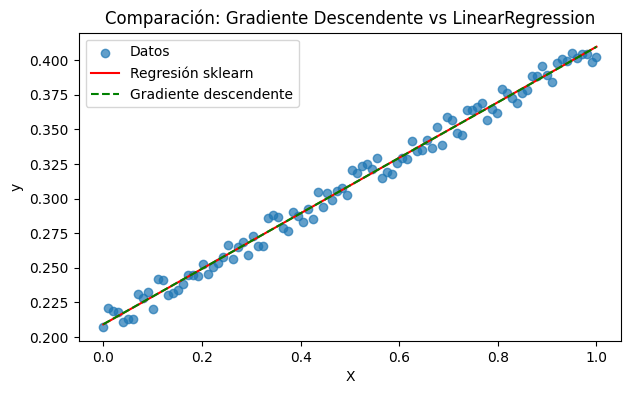

In [16]:
from sklearn.linear_model import LinearRegression

# Datos
np.random.seed(42)
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
m = len(X)

# Reformatear X para sklearn (2D)
X_reshape = X.reshape(-1, 1)

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_reshape, y)

# Parámetros obtenidos
theta0_sklearn = model.intercept_
theta1_sklearn = model.coef_[0]

print(f"θ0 (sklearn) = {theta0_sklearn:.4f}")
print(f"θ1 (sklearn) = {theta1_sklearn:.4f}")

# Construcción matricial
X_mat = np.c_[np.ones(m), X]          # (m x 2)
Theta = np.array([theta0_sklearn, theta1_sklearn]).reshape(2, 1)

# Predicción matricial
Lambda = X_mat @ Theta                 # (m x 1)
J_matrix = (1/(2*m)) * np.sum((Lambda.flatten() - y)**2)

print(f"J(Θ) (matricial) = {J_matrix:.6e}")

plt.figure(figsize=(7,4))
plt.scatter(X, y, label="Datos", alpha=0.7)
plt.plot(X, theta0_sklearn + theta1_sklearn*X, color='red', label="Regresión sklearn")
plt.plot(X, theta0 + theta1*X, color='green', linestyle='--', label="Gradiente descendente")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparación: Gradiente Descendente vs LinearRegression")
plt.legend()
plt.show()
